# KKProject_4_Clustering

In this notebook I'll build upon the the previous Notebook by performing different clustering algorithms on the data

# Libraries

In [1]:
# file management
import os
import pickle

# mathematical
import numpy as np
from scipy.spatial.distance import cdist 

# data exploration
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

# preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# modelling

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.ensemble import IsolationForest

# Dataset

- there will be no explanations, see KKProject_3_Modelling for more information

In [2]:
path = '/Users/yousefnami/KinKeepers/ProjectAI/Data/Ignacio/'
frames = []
for filename in os.listdir(path):
    if '.csv' in filename:
        frames.append(pd.read_csv(path+filename))

df = pd.concat(frames,ignore_index = True)
df['accTotal'] = np.sqrt(np.power(df[['accX','accY','accZ']],2).sum(axis = 1))
df['gyrTotal'] = np.sqrt(np.power(df[['gyrX','gyrY','gyrZ']],2).sum(axis = 1))

median = df.accTotal.median()
iqr = df.accTotal.quantile(0.75) -df.accTotal.quantile(0.25)

df = df[df.accTotal >= median-iqr]

""" IMPORTANT """

X = df[['accTotal','gyrTotal']].values
normalizer =  QuantileTransformer(output_distribution='normal')
X_normal = normalizer.fit_transform(X)

df_normal = pd.DataFrame(data = X_normal,columns = ['accTotal','gyrTotal'])

""" To reverse, write the following code: 

X = normalizer.inverse_transform(X_normal)

"""

' To reverse, write the following code: \n\nX = normalizer.inverse_transform(X_normal)\n\n'

# Cluster (MAIN)

In [10]:
""" Would like to automate, but haven't figured out yet """

## Kmeans

k-means++


<function sklearn.cluster._kmeans.KMeans.__init__(self, n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')>

## SVM

In [22]:
""" Technically a classification algorithm, but can be used for clustering purposes. Need to look into this """

' Technically a classification algorithm, but can be used for clustering purposes. Need to look into this '

## iForest

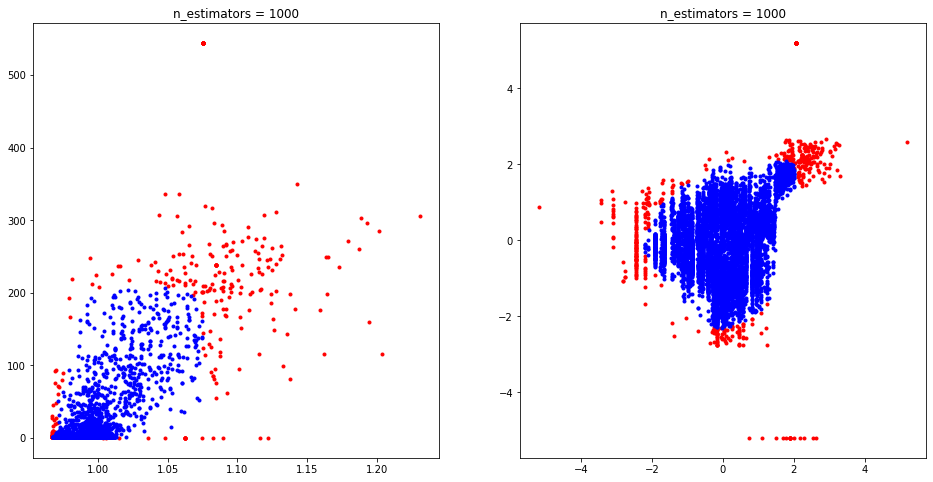

In [105]:
#outliers = red 

inliers = []
    #outliers = []
power = 1000
model = IsolationForest(n_estimators = power, max_features = X_normal.shape[1],contamination = 0.06,random_state = 0)
model.fit(X_normal)
output = model.predict(X_normal)
for result in output:
    if result == 1:
        inliers.append(True)
    else:
        inliers.append(False)
outliers = [not i for i in  inliers]
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(df.accTotal[outliers],df.gyrTotal[outliers],'r.')
plt.plot(df.accTotal[inliers],df.gyrTotal[inliers],'b.')
plt.title('n_estimators = {}'.format(power))

plt.subplot(1,2,2)
plt.plot(df_normal.accTotal[outliers],df_normal.gyrTotal[outliers],'r.')
plt.plot(df_normal.accTotal[inliers],df_normal.gyrTotal[inliers],'b.')
plt.title('n_estimators = {}'.format(power))
plt.show()

## Gaussian Mixture

[0]


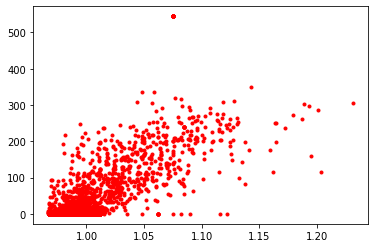

In [34]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define dataset
# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(X_normal)
# assign a cluster to each example
yhat = model.predict(X)

outliers = []
for item in yhat:
    if item == 1:
        outliers.append(True)
    else:
        outliers.append(False)


inliers = [not i for i in outliers]
plt.plot(df.accTotal[inliers],df.gyrTotal[inliers],'r.')
plt.plot(df.accTotal[outliers],df.gyrTotal[outliers],'b.')

print(unique(yhat))

## Spectral clustering

In [14]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2)

yhat = model.fit(X)
# retrieve unique clusters
clusters = unique(yhat)
clusters

# not sure but this is not working
df['clusters_spectral'] = yhat
cmap = plt.cm.get_cmap('hsv', len(clusters))

for index, cluster in enumerate(clusters):
    plt.plot(df.accTotal[df.clusters_spectral == cluster],df.gyrTotal[df.clusters_spectral == cluster], c = cmap(cluster),marker = '.',linewidth = 0)



/Users/yousefnami/python_environments/KinKeepers_AI/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


KeyboardInterrupt: 

## Mean shift

In [4]:
from numpy import unique
from matplotlib import cm
from sklearn.cluster import MeanShift

model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)


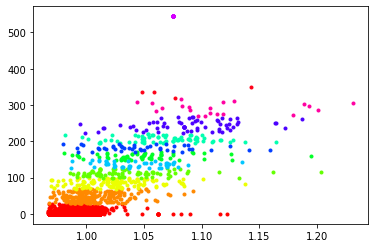

In [13]:
clusters
df['clusters_mean_shift'] = yhat
cmap = plt.cm.get_cmap('hsv', len(clusters))

for index, cluster in enumerate(clusters):
    plt.plot(df.accTotal[df.clusters_mean_shift == cluster],df.gyrTotal[df.clusters_mean_shift == cluster], c = cmap(cluster),marker = '.',linewidth = 0)


## BIRCH

[0 1]
[0 0 0 ... 1 0 1]
0    5701
1    2143
Name: clusters_birch, dtype: int64


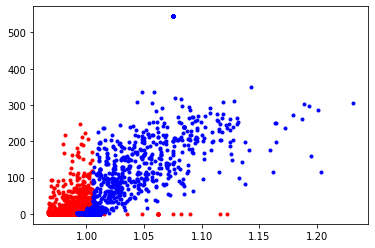

In [33]:
from sklearn.cluster import Birch


model = Birch(threshold=0.001, n_clusters=2)
# fit the model
model.fit(X_normal)
# assign a cluster to each example
yhat = model.predict(X_normal)
# retrieve unique clusters
clusters = unique(yhat)
print(clusters)
print(yhat)
df['clusters_birch'] = yhat
print(df.clusters_birch.value_counts())



outliers = []
for item in yhat:
    if item == 1:
        outliers.append(True)
    else:
        outliers.append(False)


inliers = [not i for i in outliers]
plt.plot(df.accTotal[inliers],df.gyrTotal[inliers],'r.')
plt.plot(df.accTotal[outliers],df.gyrTotal[outliers],'b.')


## Agglomerative

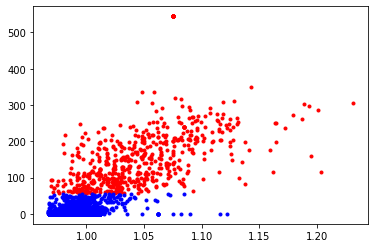

In [41]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)

outliers = []
for item in yhat:
    if item == 1:
        outliers.append(True)
    else:
        outliers.append(False)


inliers = [not i for i in outliers]
plt.plot(df.accTotal[inliers],df.gyrTotal[inliers],'r.')
plt.plot(df.accTotal[outliers],df.gyrTotal[outliers],'b.')


## DBSCAN

## Experiment

New shape = (501, 10) Old shape = (7844, 10)
Outlier percentage = 6.387047424783273%


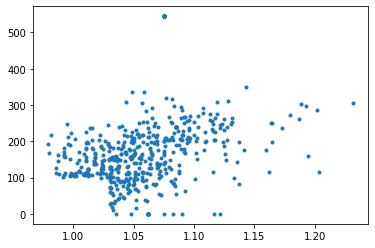

In [104]:
#experiment:

df_test = df[(df.accTotal > 1.03) | (df.gyrTotal > 100)]

plt.plot(df_test.accTotal,df_test.gyrTotal,'.')
print('New shape = {}'.format(df_test.shape), 'Old shape = {}'.format(df.shape))
print('Outlier percentage = {}%'.format((df_test.shape[0]/df.shape[0])*100))

In [ ]:
# logistic regression unsupervised? 